In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer


In [2]:
#restore the data
%store -r bitcoin_df
%store -r ethereum_df
%store -r combined

In [3]:
combined.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,With all this stimulus- why is bitcoin acting ...,,Bitcoin,1585371522,Somebodykilledmybro,6,1,True,2020-03-27
1,Abra Wallet,Is abra wallet a good place to store bitcoin i...,Bitcoin,1585373310,JayR111,4,1,True,2020-03-27
2,What he invented again?,&amp;#x200B;\n\nhttps://preview.redd.it/6dr71y...,Bitcoin,1585373575,emersondilanbentlee,1,1,True,2020-03-27
3,Watch out for the Coinbase DeFi mafia !,The **Coinbase** DeFi mafia borrows the coins ...,Bitcoin,1585373872,mimblezimble,57,1,True,2020-03-27
4,Bitcoin whale manipulates market,[removed],Bitcoin,1585376199,ProfessionalReward3,1,1,True,2020-03-27


In [5]:
#check for missing data
nulls = combined.isnull().sum()

In [6]:
nulls

title            0
selftext        34
subreddit        0
created_utc      0
author           0
num_comments     0
score            0
is_self          0
timestamp        0
dtype: int64

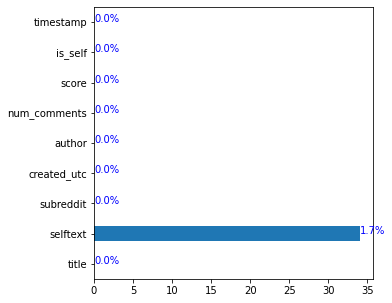

In [7]:
nulls.plot(kind = 'barh', figsize = (5,5))
for x,y in enumerate(nulls):
    plt.annotate(str(round(((y/2051)*100), 1)) + '%',  xy = (y,x), color = 'b', size =10)

In [8]:
#drop missing values
combined.dropna(inplace = True)

In [9]:
combined.shape

(4111, 9)

In [13]:
# remove rows with duplicated author 
combined.drop_duplicates(subset='author',inplace=True)
combined.shape

(3057, 9)

In [14]:
combined['is_self'].value_counts()

True    3057
Name: is_self, dtype: int64

In [15]:
#convert the subreddit class to a binary
combined['subreddit'] = combined['subreddit'].apply(lambda x: 1 if x == 'Bitcoin' else 0)

In [16]:
combined.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,With all this stimulus- why is bitcoin acting ...,,1,1585371522,Somebodykilledmybro,6,1,True,2020-03-27
1,Abra Wallet,Is abra wallet a good place to store bitcoin i...,1,1585373310,JayR111,4,1,True,2020-03-27
2,What he invented again?,&amp;#x200B;\n\nhttps://preview.redd.it/6dr71y...,1,1585373575,emersondilanbentlee,1,1,True,2020-03-27
3,Watch out for the Coinbase DeFi mafia !,The **Coinbase** DeFi mafia borrows the coins ...,1,1585373872,mimblezimble,57,1,True,2020-03-27
4,Bitcoin whale manipulates market,[removed],1,1585376199,ProfessionalReward3,1,1,True,2020-03-27


In [17]:
#drop unnecessary columns
combined.drop(columns = ['created_utc', 'timestamp', 'is_self', 'author', 'num_comments', 'score'], inplace = True)

In [18]:
combined.head(2) #check for the changes

,title,selftext,subreddit
0,With all this stimulus- why is bitcoin acting ...,,1
1,Abra Wallet,Is abra wallet a good place to store bitcoin i...,1


In [19]:
%store combined

Stored 'combined' (DataFrame)
